In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Random Stock Price
2. NetLogo examples

# 1. Random Stock Price

In [2]:
np.random.rand()
np.random.choice([-1,1])

-1

In [3]:
def generate_random_walk(start=260, steps=100, random_state=1, mult=1):
    random = np.random.RandomState(random_state)
    price = [start]
    for i in range(steps):
        add = random.rand()
        sign = random.choice([-1,1])
        new_price = price[i] + add * sign * mult
        price.append(new_price)
    return price        

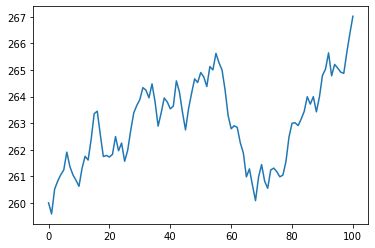

In [4]:
price = generate_random_walk()
plt.plot(price);

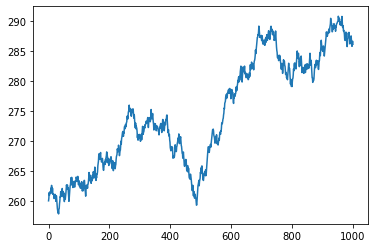

In [5]:
price = generate_random_walk(steps=1000, random_state=2)
plt.plot(price);

In [6]:
prices = []
for i in range(20):
    price = generate_random_walk(steps=1000, random_state=i)
    prices.append(price)

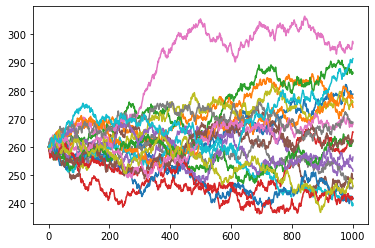

In [7]:
for p in prices:
    plt.plot(p);

In [8]:
from tqdm import tqdm

In [9]:
prices = []
for i in tqdm(range(3000)):
    price = generate_random_walk(steps=200, random_state=i)
    prices.append(price)
prices = np.array(prices)

100%|██████████| 3000/3000 [00:10<00:00, 274.45it/s]


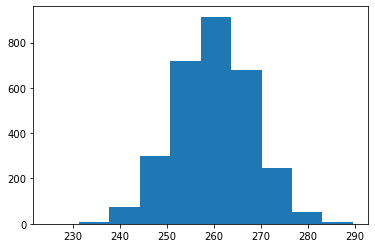

In [10]:
plt.hist(prices[:, -1]);

In [11]:
prices = []
for i in range(20):
    price = generate_random_walk(steps=10000, random_state=i)
    prices.append(price)

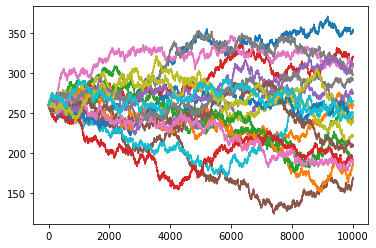

In [12]:
for p in prices:
    plt.plot(p);

In [13]:
prices = []
for i in tqdm(range(3000)):
    price = generate_random_walk(steps=1000, random_state=i)
    prices.append(price)
prices = np.array(prices)

100%|██████████| 3000/3000 [00:55<00:00, 54.36it/s]


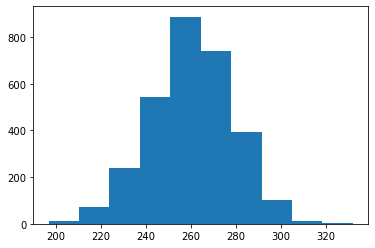

In [14]:
plt.hist(prices[:, -1]);

# Compare with some stock market prices

In [15]:
# !pip install yfinance

[*********************100%***********************]  1 of 1 completed


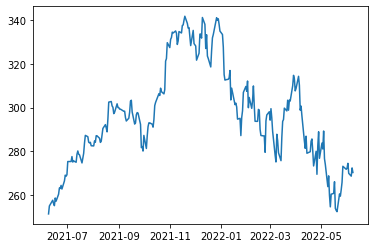

In [16]:
import yfinance as yf 

data = yf.download('MSFT', '2021-06-10', '2022-06-09')  # Microsoft

plt.plot(data['Adj Close'])

In [24]:
data['Adj Close'].head(3)

Date
2021-06-09    251.536057
2021-06-10    255.156494
2021-06-11    255.801239
Name: Adj Close, dtype: float64

In [17]:
prices = []
for i in range(20):
    price = generate_random_walk(start= 251.536057, steps=253, random_state=i)
    prices.append(price)

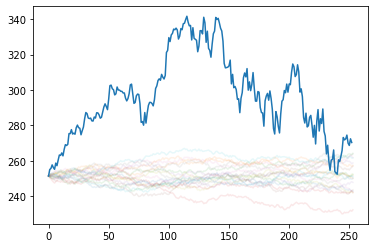

In [18]:
for p in prices:
    plt.plot(p, alpha=0.1);
plt.plot(data['Adj Close'].values)

In [19]:
prices = []
for i in range(20):
    price = generate_random_walk(start= 251.536057, steps=252, random_state=i, mult=5)
    prices.append(price)

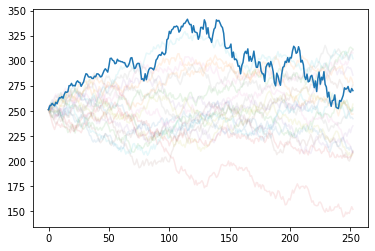

In [20]:
for p in prices:
    plt.plot(p, alpha=0.1);
plt.plot(data['Adj Close'].values);

In [21]:
from sklearn.metrics import mean_squared_error

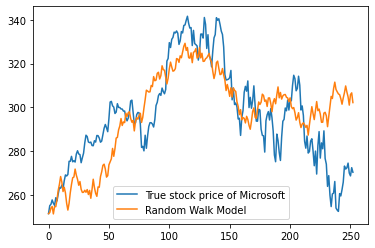

In [26]:
mse = []
for p in prices:
    mse.append(mean_squared_error(data['Adj Close'].values, p))
    
i = np.argmin(mse)    
plt.plot(data['Adj Close'].values, label='True stock price of Microsoft')
plt.plot(prices[i], label='Random Walk Model')
plt.legend();

# 2. NetLogo examples

- Forest Fire http://www.netlogoweb.org/launch#http://www.netlogoweb.org/assets/modelslib/Sample%20Models/Earth%20Science/Fire.nlogo

- Bank Reserves http://www.netlogoweb.org/launch#http://ccl.northwestern.edu/netlogo/models/models/Sample%20Models/Social%20Science/Economics/Unverified/Bank%20Reserves.nlogo